In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from scipy.signal import butter, filtfilt, freqz

# Bagian Baru

In [ ]:
# Load and Read Dataset
df = pd.read_csv("/content/data_1601_accel_phone.txt", sep=",")
df.columns = ["Subject_ID", "Activity_Code", "Timestamp", "x", "y", "z"]
df['z'] = df['z'].str.replace(';','')
df['z'] = df['z'].astype('float64')

In [ ]:
df.isna().sum()

Subject_ID       0
Activity_Code    0
Timestamp        0
x                0
y                0
z                0
dtype: int64

In [ ]:
df.isnull().sum()

Subject_ID       0
Activity_Code    0
Timestamp        0
x                0
y                0
z                0
dtype: int64

In [ ]:
df.head()

,Subject_ID,Activity_Code,Timestamp,x,y,z
0,1601,A,265073348330612,5.354632,15.635334,-0.629077
1,1601,A,265073388368581,6.399701,12.926893,0.450110
2,1601,A,265073428111445,10.532093,13.207614,-1.024718
3,1601,A,265073468081082,16.129736,2.683301,1.142633
4,1601,A,265073508462957,0.393248,6.549937,-3.782240


In [ ]:
df.tail()

,Subject_ID,Activity_Code,Timestamp,x,y,z
81451,1601,S,258908699056416,2.015319,9.988011,0.746392
81452,1601,S,258908738947822,1.681927,10.074801,1.726219
81453,1601,S,258908778855321,1.148020,9.127296,1.492186
81454,1601,S,258908818435165,1.417966,9.126099,1.077989
81455,1601,S,258908858366259,1.383250,10.053851,2.373252


In [ ]:
df.describe()

,Subject_ID,Timestamp,x,y,z
count,81456.0,8.145600e+04,81456.000000,81456.000000,81456.000000
mean,1601.0,2.635069e+14,-1.621992,3.643569,4.802328
std,0.0,3.606239e+12,3.874677,5.830037,4.623182
min,1601.0,2.580269e+14,-19.613300,-19.613300,-19.613300
25%,1601.0,2.597430e+14,-4.298191,0.499191,0.626084
50%,1601.0,2.647245e+14,-2.299930,1.520917,5.847239
75%,1601.0,2.671165e+14,0.949900,9.351153,8.658031
max,1601.0,2.685413e+14,19.612701,19.612701,19.612701


In [ ]:
df.dtypes

Subject_ID         int64
Activity_Code     object
Timestamp          int64
x                float64
y                float64
z                float64
dtype: object

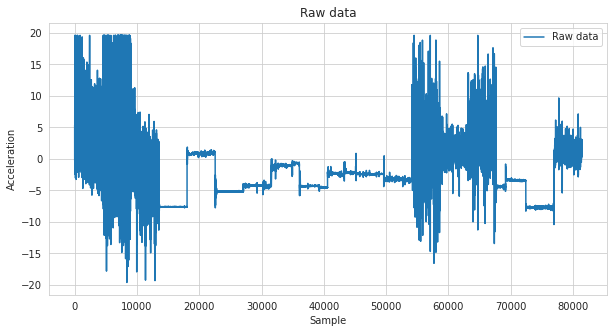

In [ ]:
# Plot raw data
plt.figure(figsize=(10, 5))
plt.plot(df['x'], label='Raw data')
plt.title('Raw data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

<Axes: >

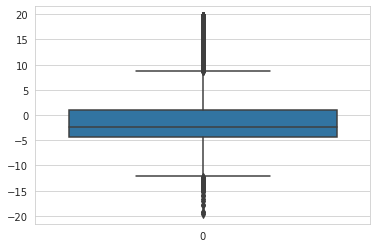

In [ ]:
# Boxplot 
# Create a boxplot using Seaborn
sns.set_style("whitegrid")  # Set the style of the plot
sns.boxplot(df['x'])

<Axes: >

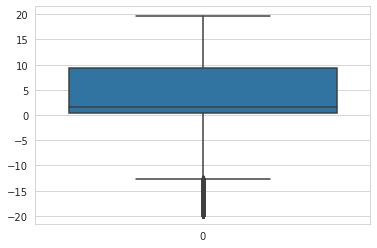

In [ ]:
# Boxplot 
# Create a boxplot using Seaborn
sns.set_style("whitegrid")  # Set the style of the plot
sns.boxplot(df['y'])

In [ ]:
# Function filter for filter the lowpass freq
def butter_lowpass_filter(data, cutoff, fs, order):
  nyq = 0.5 * fs
  normal_cutoff = cutoff / nyq
  # Get the filter coefficients 
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a, data)
  return y

In [ ]:
# Settng filter
order = 5
fs = 30.0
cutoff = 5

In [ ]:
data = df.drop(['Subject_ID','Activity_Code'], axis=1)

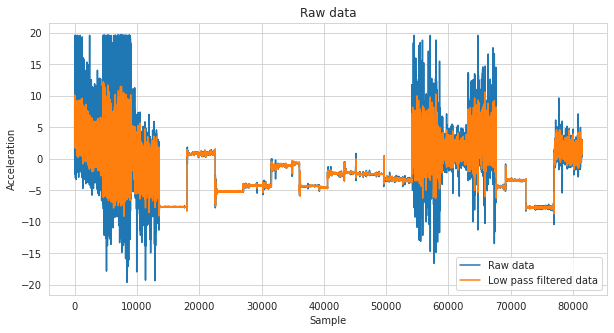

In [ ]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data['x'], cutoff, fs, order)

# Plot raw data
plt.figure(figsize=(10, 5))
plt.plot(df['x'], label='Raw data')
plt.plot(y, label='Low pass filtered data')
plt.title('Raw data')
plt.xlabel('Sample')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

# **MVA Filter**

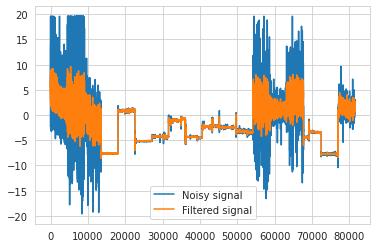

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df['x']

# Define the filter parameters
window_size = 5

# Create the MVA filter
window = np.ones(window_size) / window_size
filtered_x = np.convolve(df['x'], window, mode='same')

# Plot the results
plt.plot(x, label='Noisy signal')
plt.plot(filtered_x, label='Filtered signal')
plt.legend()
plt.show()

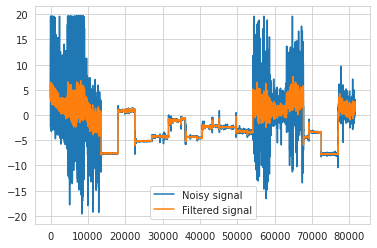

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df['x']

# Define the filter parameters
window_size = 10

# Create the MVA filter
window = np.ones(window_size) / window_size
filtered_x = np.convolve(df['x'], window, mode='same')

# Plot the results
plt.plot(x, label='Noisy signal')
plt.plot(filtered_x, label='Filtered signal')
plt.legend()
plt.show()

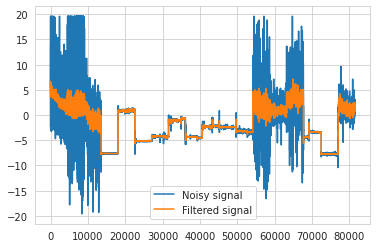

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = df['x']

# Define the filter parameters
window_size = 15

# Create the MVA filter
window = np.ones(window_size) / window_size
filtered_x = np.convolve(df['x'], window, mode='same')

# Plot the results
plt.plot(x, label='Noisy signal')
plt.plot(filtered_x, label='Filtered signal')
plt.legend()
plt.show()